<a href="https://colab.research.google.com/github/2303A51739/AIML-1739-/blob/main/Aiml_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
sns.set(style='whitegrid')

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
print("Data Types of Each Feature:\n")
print(df.dtypes)

Data Types of Each Feature:

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
print("\nSummary Statistics of the Titanic Dataset:\n")
print(df.describe(include=[np.number], percentiles=[.25, .5, .75, .9]))



Summary Statistics of the Titanic Dataset:

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
90%      1.000000    3.000000   50.000000    1.000000    2.000000   77.958300
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
print("\nColumn Names in the Dataset:\n")
print(df.columns)


Column Names in the Dataset:

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


<ipython-input-7-71774c501fda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


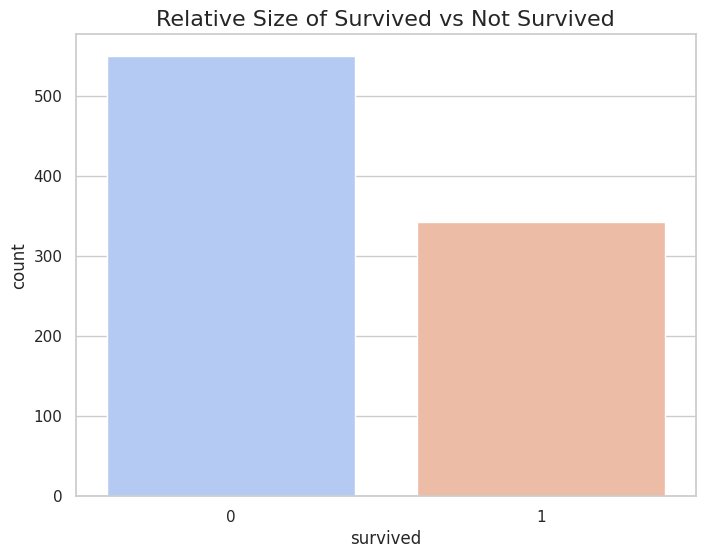

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title('Relative Size of Survived vs Not Survived', fontsize=16)
plt.show()

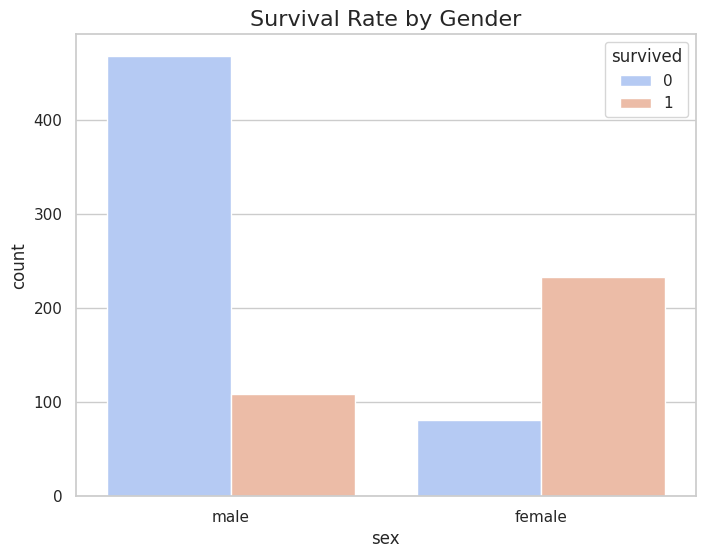

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender', fontsize=16)
plt.show()

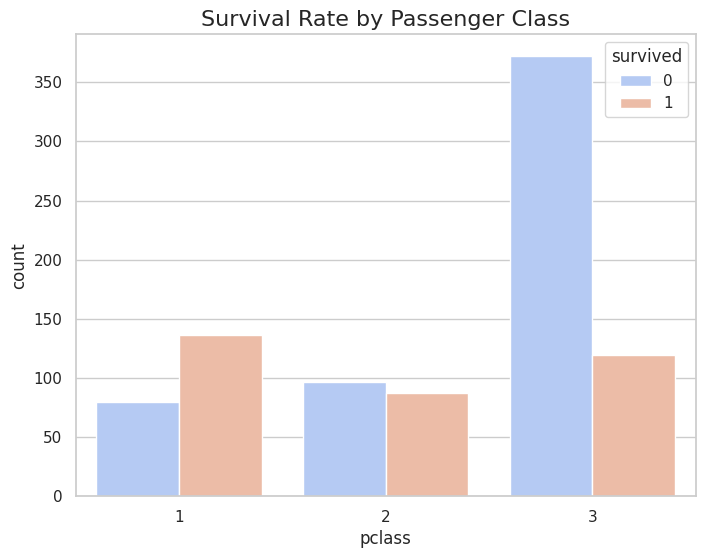

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.show()


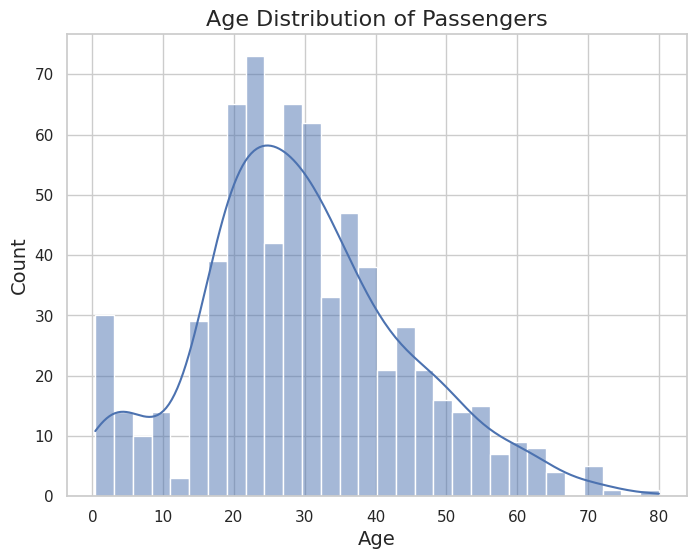

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


<ipython-input-11-2e463b254fbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=df, palette='coolwarm')


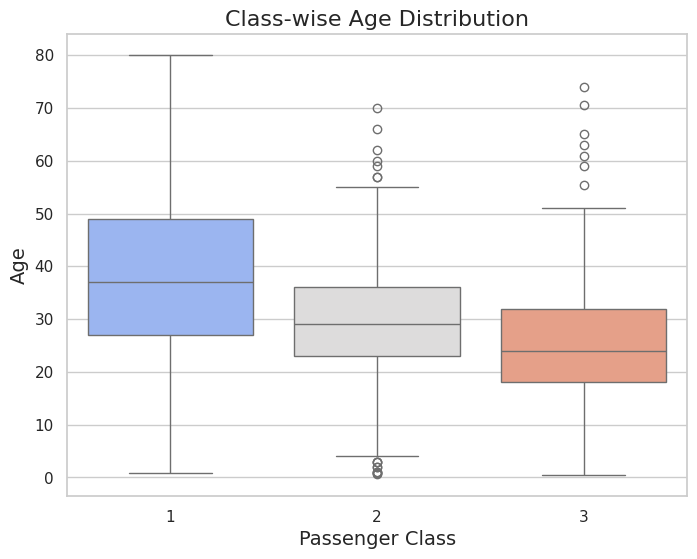

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=df, palette='coolwarm')
plt.title('Class-wise Age Distribution', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

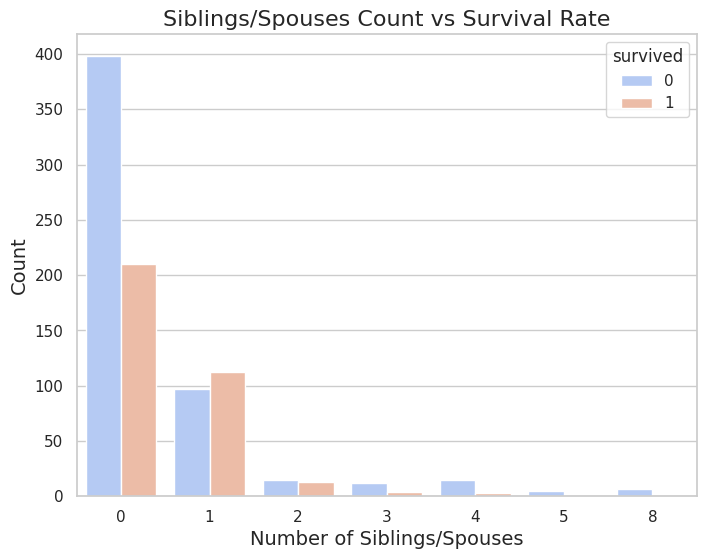

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sibsp', hue='survived', data=df, palette='coolwarm')
plt.title('Siblings/Spouses Count vs Survival Rate', fontsize=16)
plt.xlabel('Number of Siblings/Spouses', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [ ]:
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])


In [ ]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'].fillna('S'))
df['class'] = LabelEncoder().fit_transform(df['class'].fillna('First'))

In [ ]:
df = df.dropna(subset=['fare'])


In [ ]:
print("\nCleaned Dataset:\n")
print(df.head())


Cleaned Dataset:

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class
0         0       3    1  22.0      1      0   7.2500         2      2
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      2
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler



In [ ]:
X = df.drop(columns=['survived'])

In [ ]:
X = df.drop(columns=['survived'])

In [ ]:
Y = df['survived']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
Y_pred = log_reg.predict(X_test_scaled)

In [ ]:
f1 = f1_score(Y_test, Y_pred)

print(f"F1 Score: {f1:.4f}")


F1 Score: 0.7642


In [ ]:
penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    log_reg = LogisticRegression(penalty=penalty, solver='liblinear', max_iter=1000)
    log_reg.fit(X_train_scaled, Y_train)
    Y_pred = log_reg.predict(X_test_scaled)
    f1 = f1_score(Y_test, Y_pred)
    f1_scores.append(f1)
    print(f"F1 Score with penalty={penalty}: {f1:.4f}")

F1 Score with penalty=l1: 0.7642
F1 Score with penalty=l2: 0.7642


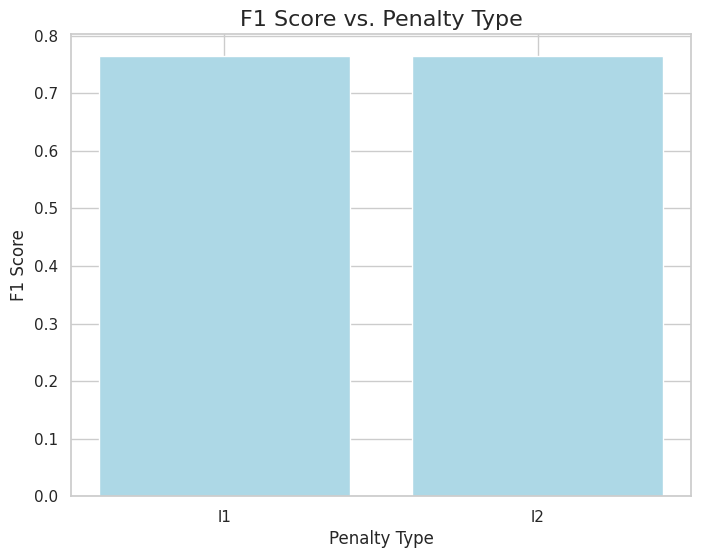

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(penalties, f1_scores, color='lightblue')
plt.xlabel('Penalty Type')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Penalty Type', fontsize=16)
plt.show()